# 简介

scikit-learn的datasets模块主要提供了一些导入、在线下载及本地生成数据集的方法

模块的主要函数如下

![图 7](image/2022-05-26-pic_1653571154585.png)  


# 自带数据集 `load_<name>`

![图 8](image/2022-05-26-pic_1653571172804.png)  


In [4]:
from sklearn.datasets import load_iris

In [5]:
data=load_iris()

In [7]:
#查看数据描述
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

# 在线下载数据集 `fetch_<name>`

![图 9](image/2022-05-26-pic_1653571194057.png)  


## 通过`fetch_<name>` 直接下载

![图 10](image/2022-05-26-pic_1653571207433.png)  


注意:`fetch_<name>` 从国外下载数据集，速度可能慢

In [8]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train=fetch_20newsgroups(subset='train')
newsgroups_test=fetch_20newsgroups(subset='test')

## 下载 svmlight/libsvm 格式到本地载入

scikit-learn提供以svmlight/libsvm格式加载数据集,更多请参考：[svmlight/libsvm格式公共数据集](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/)

在该模块中，使用SciPy稀疏CSR矩阵，并使用numpy数组

这种格式中，每一行都采用表格，此格式特别适用于稀疏数据集


In [10]:
from sklearn.datasets import load_svmlight_file
X_train , y_train = load_svmlight_file( "/path/to/train_dataset.txt " )
newsgroups_test = fetch_28newsgroups(subset='test')

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/train_dataset.txt '

## 通过fetch_openml下载

openml.org是机器学习数据和实验的公共存储库，允许每个人上传开放数据集,更多请参考：[OpemML官网](https://www.openml.org/search?type=data)

sklearn.datasets能够从存储库下载数据集

In [11]:
from sklearn.datasets import fetch_openml
mice=fetch_openml(name='miceprotein',version=4)
print(mice.DESCR)

**Author**: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) - 2015   
**Please cite**: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. Th

In [12]:
mice.url

'https://www.openml.org/d/40966'

# 数据生成接口

scikit-learn提供了随机数据生成的接口，我们可以很方便地生成指定机器学习类型的数据集

![图 11](image/2022-05-26-pic_1653571225768.png)  


## 常用接口

### 用于分类和聚类的接口

此接口可生产单标签和多标签，单标签分类和聚类数据的接口函数如下：

![图 12](image/2022-05-26-pic_1653571239901.png)  


### 用于多标签分类的接口

make_multilabel_classification生成多类多标签数据集，生成的数据集模拟了从很多话题的混合分布中抽取词袋模型，每个文档的话题数量符合泊松分布。话题本身从一个固定的随机分布中抽取出来，同样，单词数量也是泊松分布抽取，句子则是从多项式抽取。

### 用于双聚类的接口函数

make_biclusters生成具有恒定块对角线结构的数据；

make_checkerboard生成具有用于双聚类的块棋盘结构的数据。

### 用于回归类型的接口函数

![图 13](image/2022-05-26-pic_1653571250165.png)  


### 用于流行学习的接口函数

流形学习，全称流形学习方法（Manifold Learning）

假设数据是均匀采样于一个高维欧氏空间中的低维流形，流形学习就是从高维采样数据中恢复低维流形结构，即找到高维空间中的低维流形，并求出相应的嵌入映射，以实现维数约简或者数据可视化

从观测到的现象中去寻找事物的本质，进而找到产生数据的内在规律。

![图 14](image/2022-05-26-pic_1653571259504.png)  


### 用于可降维的接口函数

![图 15](image/2022-05-26-pic_1653571269390.png)  


## 分类模型随机数据生成

### make_classification

```PYTHON
make_classification(
    n_samples=100, #样本数量
    n_features=20, #特征个数 =n_informative+n_redundant+n_repeated
    *,
    n_informative=2,#信息特征的个数
    n_redundant=2,#冗余信息,informative特征的随机线性组合
    n_repeated=0,#重复信息，随机提取n_informative和n_redundant特征
    n_classes=2,#分类类别
    n_clusters_per_class=2,#某一个类别是由几个cluster构成的
    weights=None,#分类类别的样本比例，默认值是None，代表均衡比例。
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,#随机打乱样本
    random_state=None,#随机数种子，默认值是None，不配置该参数每次生成的数据都是随机的。
)
```

In [19]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

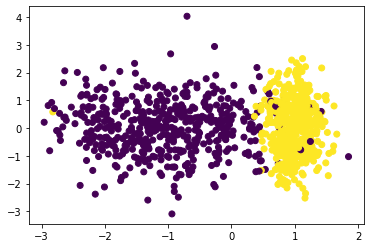

In [21]:
X,Y=make_classification(
    n_samples=1000,
    n_features=5,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=20
)
plt.scatter(X[:,0],X[:,1],marker='o',c=Y)
plt.show()

## 回归模型随机数据生成

### make_regression

```PYTHON
make_regression(
    n_samples=100,#样本数量
    n_features=100,#特征个数
    *,
    n_informative=10,#信息特征的个数
    n_targets=1,#回归目标的数量
    bias=0.0,#线性模型中的偏差项
    effective_rank=None,
    tail_strength=0.5,
    noise=0.0,#高斯分布的标准差
    shuffle=True,#随机打乱样本
    coef=False,
    random_state=None,#随机数种子
)
```

In [22]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

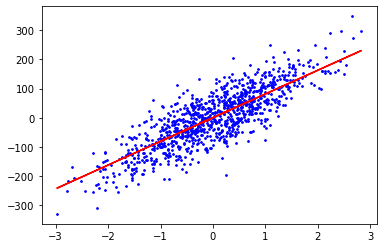

In [33]:
X,Y,coef=make_regression(
    n_samples=1000,
    n_features=3,
    noise=10,
    coef=True,
    random_state=20
)
plt.scatter(X[:,0],Y,c='b',s=3)
plt.plot(X[:,0],X[:,0]*coef[0], c='r')
plt.show()

## 聚类模型随机数据生成

### make_blobs

```PYTHON
make_blobs(
    n_samples=100,#样本数量
    n_features=2,#特征个数
    *,
    centers=None,#产生数据的中心点
    cluster_std=1.0,#数据集的标准差
    center_box=(-10.0, 10.0),#中心确定之后的数据边界
    shuffle=True,#随机打乱样本
    random_state=None,#随机数种子
    return_centers=False,
)
```

In [26]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

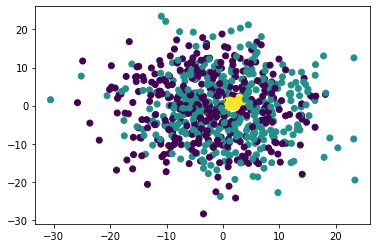

In [32]:
#X为样本特征，Y为样本类别输出，共1088个样本，每个样本2个特征,共3个簇
#簇中心在[-1，-1]，[1，1]，[2，2]，簇方差分别为[0.4，8.5,8.2]
X,Y = make_blobs(
    n_samples=1088,
    n_features=5,
    centers=[[-2,-1],[1,-0.5],[2,1]],
    cluster_std=[8.6,8.3,0.5],
    random_state =20
)
plt.scatter(X[:,0],X[:,1],marker='o',c=Y)
plt.show()

# 随机数生成

![图 16](image/2022-05-26-pic_1653571281978.png)  


## 真伪随机数

真随机数发生器：像无法实现永动机一样，靠程序是永远无法实现真随机数的。真正的随机数是使用物理现象产生的：比如掷骰子、使用电子元件的噪声、核裂变等，这样的随机数发生器叫作真随机数发生器，也称物理性随机数发生器，它们的缺点是技术要求比较高

伪随机数发生器：程序得到的随机数是通过一个固定的、可以重复的计算方法生成的，这本身就违反了随机的定义，但是它们具有类似于随机数的统计特征，这样的随机数发生器叫作伪随机数发生器。在实际应用中往往使用伪随机数就足够了。伪随机数中一个很重要的概念就是种子，种子决定了随机数的固定序列，种子固定了，得到的序列就是相同的。

## 计算机如何生成随机数

计算器如何生成随机数

随机种子是用来产生随机数的一个数，在计算机中，它是一个无符号整形数。那么随机种子是从哪里获得的呢？随机种子一般取自系统时钟，确切地说，是来自计算机主板上的定时器在内存中的记数值（注：计算机的主机板上都会有这样一个定时器用来计算当前系统时间，每过一个时钟信号周期计数器都会加1）。

伪随机数生成函数虽然只是几个简单的函数，但却是科学家多年的研究成果

1）伪随机数并不是假随机数，这里的“伪”是有规律的意思，即计算机产生的伪随机数既是随机的又是有规律的。

2）随机种子一般使用自系统时钟。

3）随机数是由随机种子根据一定的计算方法计算出来的数值，所以只要计算方法和随机种子固定，那么产生的随机数就不会变。

## 随机数应用场景

![图 17](image/2022-05-26-pic_1653571292164.png)  


## 随机数生成示例

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [35]:
#配置随机数种子，不指定随机数种子每次生成的数据都不—样
np.random.seed(10)

In [39]:
#从均匀分布([low,high):半开区间)中进行采样浮点数
np.random.uniform(low=1,high=3,size=180)

array([2.51504672, 2.79310832, 2.8444389 , 2.86376125, 2.16563778,
       1.04018727, 2.12861434, 1.40068058, 2.61657867, 1.6426195 ,
       2.78825976, 1.98599856, 1.1314587 , 1.26737106, 2.8938282 ,
       2.70588763, 1.10736279, 1.32660162, 2.09444659, 1.1652066 ,
       1.975018  , 1.99907981, 2.01167681, 2.3639731 , 1.0138137 ,
       1.52432488, 1.65300556, 1.57621102, 2.67517621, 2.10098331,
       2.75480956, 1.77119109, 2.04927523, 1.62005417, 1.12856207,
       1.58354398, 1.14002311, 1.73215736, 1.87715182, 2.78154331,
       1.65067639, 1.02069448, 2.38659687, 1.16917686, 2.36889338,
       2.20500116, 1.66071586, 1.93486243, 2.13242464, 1.43180769,
       1.27909033, 1.9920743 , 2.95711598, 1.93298552, 1.37444759,
       2.35893266, 2.84639323, 1.87235745, 1.97453727, 1.27129925,
       2.02866953, 2.62058241, 1.03974128, 1.69646237, 2.48134696,
       1.94508914, 1.66096874, 1.68200116, 1.29282756, 2.29664931,
       2.7648416 , 1.86595572, 1.96952319, 2.42099117, 2.04781

In [37]:
#从均匀分布([low， high):半开区间)中进行采样浮点数，生成188*180矩阵
np.random.uniform(low=1,high=3,size=[100,100])

array([[1.86175801, 2.90608495, 1.96457909, ..., 2.74139576, 1.96700807,
        1.45704817],
       [2.13314735, 2.55323619, 2.87803901, ..., 2.09150637, 2.82861779,
        1.79923538],
       [2.40168973, 1.87859046, 1.36724993, ..., 1.05403272, 2.56731939,
        2.52450442],
       ...,
       [2.78591185, 1.31183092, 1.02217445, ..., 2.45004127, 1.81721688,
        2.90737658],
       [1.87350793, 2.81951553, 1.7536304 , ..., 2.04843737, 1.01271546,
        2.24184855],
       [1.62162314, 2.76485496, 2.81506778, ..., 2.86810961, 2.97839876,
        2.81319599]])

In [40]:
#生成半开半闭区间[low,high)上离散均匀分布的整数值
np.random.randint(low=1,high=10,size=100)

array([9, 3, 3, 7, 1, 4, 5, 2, 4, 1, 3, 2, 1, 4, 5, 6, 7, 7, 7, 6, 9, 7,
       3, 7, 9, 5, 2, 1, 2, 3, 3, 7, 4, 1, 9, 6, 7, 2, 4, 3, 9, 5, 7, 2,
       8, 3, 5, 1, 6, 3, 8, 5, 2, 3, 7, 8, 7, 3, 9, 4, 2, 4, 8, 4, 7, 3,
       2, 6, 6, 2, 5, 1, 4, 8, 9, 4, 2, 9, 2, 2, 1, 9, 5, 4, 6, 1, 6, 7,
       5, 2, 8, 9, 2, 6, 7, 1, 5, 2, 5, 6])

In [41]:
#正态分布
np.random.normal(loc=8,scale=1.8,size=180)

array([ 9.24670632,  6.46545358,  4.43892032,  6.17399963,  9.50600554,
        6.94197136,  7.86110293,  8.42797034,  6.99693251, 10.44326684,
        6.79852628,  9.92906185, 10.40637913,  7.28668811, 11.95059516,
        7.15873859,  6.15358469,  5.87183778,  9.09218687,  6.77413001,
        7.74315617,  8.95303476, 10.90128834,  6.43164067,  7.52614406,
        7.25158784,  6.10262561,  7.46906005,  9.24781279,  6.76806111,
        4.69405409, 11.12312405,  7.65533652,  5.85943877,  6.54624896,
        5.16683848,  7.34801081,  7.82507133,  9.73277076, 10.72273086,
        5.99601142, 10.8438568 , 10.03766093,  8.14269305,  7.89857233,
        5.69133752,  7.5801861 ,  6.77096873,  7.64513239,  9.09182601,
        5.86891704,  5.39954189,  8.53197667,  7.94909633,  7.36441915,
        8.21610572,  8.14569991,  5.52549176,  5.91374467,  7.03361059,
        7.41089399,  4.97976513, 10.40234918,  8.23324585,  7.0014836 ,
        9.20837525,  9.30671217,  9.47899864,  7.21371664,  8.52